# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Input data
news_input = [
    "Breaking: Alien Invasion Imminent, Government Warns",
    "Study Finds Vaccines Effective in Preventing Disease",
    "Billionaire Elon Musk to Fund Mission to Mars",
    "Exclusive: Top-Secret Government Files Leaked",
]

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_text = [[word for word in doc.lower().split() if word not in stop_words] for doc in news_input]

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

# Compute coherence scores for different numbers of topics
coherence_scores = []
for k in range(4, 16):
    lda_model = LdaModel(corpus=corpus, num_topics=k, id2word=dictionary)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))

# Find the K with the highest coherence score
best_k, best_coherence = max(coherence_scores, key=lambda x: x[1])


# Train the final LDA model with the best K
final_lda_model = LdaModel(corpus=corpus, num_topics=best_k, id2word=dictionary)

# Summarize the topics
topics = final_lda_model.print_topics(num_words=5)  # You can change the number of words in topics

# Print the best K and the topics
print("Optimal number of topics (K):", best_k)
print("Coherence Score of topics:", best_coherence)
print("Topics:")
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Optimal number of topics (K): 14
Coherence Score of topics: 0.4416564592632065
Topics:
(0, '0.045*"government" + 0.045*"files" + 0.045*"exclusive:" + 0.045*"leaked" + 0.045*"alien"')
(1, '0.163*"leaked" + 0.163*"files" + 0.163*"top-secret" + 0.163*"government" + 0.163*"exclusive:"')
(2, '0.045*"government" + 0.045*"exclusive:" + 0.045*"files" + 0.045*"top-secret" + 0.045*"mission"')
(3, '0.142*"fund" + 0.142*"billionaire" + 0.142*"musk" + 0.142*"elon" + 0.142*"mars"')
(4, '0.045*"government" + 0.045*"alien" + 0.045*"exclusive:" + 0.045*"mars" + 0.045*"files"')
(5, '0.142*"invasion" + 0.142*"imminent," + 0.142*"warns" + 0.142*"breaking:" + 0.142*"government"')
(6, '0.045*"government" + 0.045*"alien" + 0.045*"mission" + 0.045*"files" + 0.045*"leaked"')
(7, '0.045*"government" + 0.045*"alien" + 0.045*"exclusive:" + 0.045*"mission" + 0.045*"files"')
(8, '0.142*"finds" + 0.142*"study" + 0.142*"vaccines" + 0.142*"effective" + 0.142*"disease"')
(9, '0.045*"government" + 0.045*"mars" + 0.045*"

In [4]:
#We got highest coherence score at K= 15 (i.e.) 0.44. The topic are majorly related to government, disease etc

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [5]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [6]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [7]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [8]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [9]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [10]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [11]:
doc_set=[
    "Breaking: Alien Invasion Imminent, Government Warns",
    "Study Finds Vaccines Effective in Preventing Disease",
    "Billionaire Elon Musk to Fund Mission to Mars",
    "Exclusive: Top-Secret Government Files Leaked",
]

In [12]:
doc_clean=preprocess_data(doc_set)

In [13]:
doc_clean

[['break', 'alien', 'invas', 'immin', 'govern', 'warn'],
 ['studi', 'find', 'vaccin', 'effect', 'prevent', 'diseas'],
 ['billionair', 'elon', 'musk', 'fund', 'mission', 'mar'],
 ['exclus', 'top', 'secret', 'govern', 'file', 'leak']]

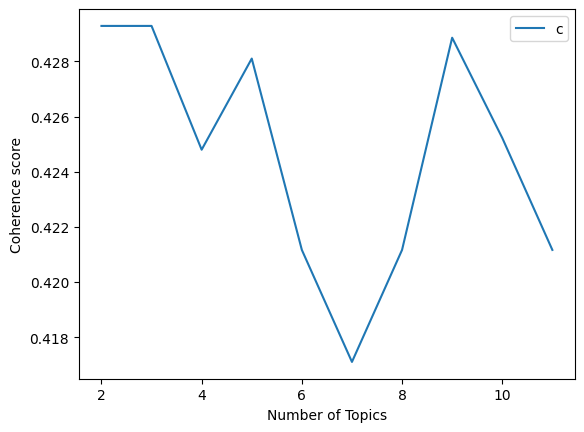

In [14]:
start,stop,step=2,12,1
plot_graph(doc_clean,start,stop,step)

In [15]:
dictionary,doc_term_matrix=prepare_corpus(doc_clean)
model = LsiModel(doc_term_matrix, num_topics=2, id2word = dictionary)
model.print_topics()

[(0,
  '0.535*"govern" + 0.267*"break" + 0.267*"top" + 0.267*"immin" + 0.267*"invas" + 0.267*"warn" + 0.267*"secret" + 0.267*"leak" + 0.267*"file" + 0.267*"exclus"'),
 (1,
  '0.408*"mission" + 0.408*"billionair" + 0.408*"elon" + 0.408*"musk" + 0.408*"fund" + 0.408*"mar" + 0.000*"break" + 0.000*"invas" + 0.000*"alien" + 0.000*"warn"')]

In [16]:
#Optimal k-value is 2 with coherence score being 0.44 at this point which is the highest.

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [19]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 19.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [20]:
sentences = [
    "Breaking: Alien Invasion Imminent, Government Warns",
    "Experts Analyze UFO Sightings Amid Rising Speculation",
    "NASA Prepares Emergency Response Protocols for Extraterrestrial Contact",
    "Citizens Brace for Potential Alien Encounter, Stockpiling Supplies",
    "Conspiracy Theorists Point to Recent Events as Evidence of Alien Presence",
    "Study Finds Vaccines Effective in Preventing Disease",
    "Health Officials Advocate for Widespread Immunization Campaigns",
    "Public Health Initiatives Highlight Importance of Vaccination Education",
    "Vaccine Research Continues to Advance Amid Global Health Concerns",
    "Controversy Surrounds Anti-Vaccination Movement, Experts Warn of Risks",
    "Billionaire Elon Musk to Fund Mission to Mars",
    "SpaceX Unveils Ambitious Plans for Interplanetary Colonization",
    "Mars Mission Crew Selection Process Underway, Thousands Apply",
    "Technological Innovations Propel Humanity Closer to Martian Exploration",
    "Exclusive: Top-Secret Government Files Leaked",
    "Whistleblower Reveals Classified Documents Detailing Government Operations",
    "Authorities Launch Investigation into Security Breach Amid Data Leak",
    "Public Outcry Over Privacy Violations Sparks Demands for Accountability",
    "Government Officials Scramble to Contain Fallout from Confidential Information Release",
    "Climate Scientists Issue Dire Warning on Global Warming",
    "Renewable Energy Initiatives Gain Traction Amid Climate Crisis",
    "Extreme Weather Events Continue to Escalate, Prompting Calls for Action",
    "Environmental Activists Rally for Policy Reform to Combat Climate Change",
    "Artificial Intelligence Breakthroughs Revolutionize Industry",
    "Ethical Concerns Arise Over AI's Role in Decision-Making Processes",
    "Companies Invest Billions in AI Research and Development Efforts",
    "AI-Powered Technologies Transform Healthcare, Enhancing Patient Care",
    "Space Exploration Enters New Era With Advancements in Technology",
    "Scientists Discover New Exoplanets With Potential for Life",
    "International Space Agencies Collaborate on Ambitious Space Missions"
]


In [21]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(sentences)

2024-03-29 03:19:45,622 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-29 03:19:52,476 - BERTopic - Embedding - Completed ✓
2024-03-29 03:19:52,479 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-29 03:20:04,329 - BERTopic - Dimensionality - Completed ✓
2024-03-29 03:20:04,331 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-29 03:20:04,343 - BERTopic - Cluster - Completed ✓
2024-03-29 03:20:04,356 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-29 03:20:04,386 - BERTopic - Representation - Completed ✓


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

In [24]:
vocabulary = vectorizer.get_feature_names_out()

In [25]:
tokenized_documents = [doc.split() for doc in vocabulary]

In [26]:
coherence_model = CoherenceModel(topics=topics, texts=tokenized_documents, dictionary=vocabulary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

TypeError: 'int' object is not iterable

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
pip install pyLDAvis

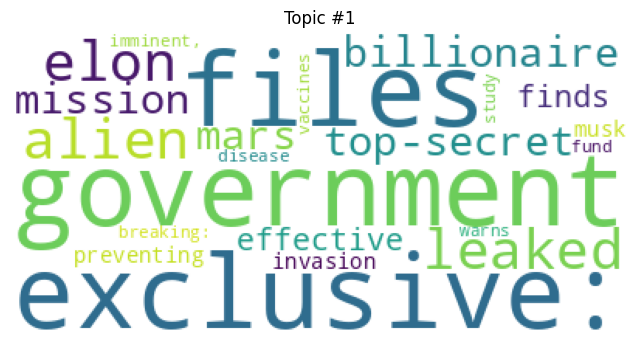

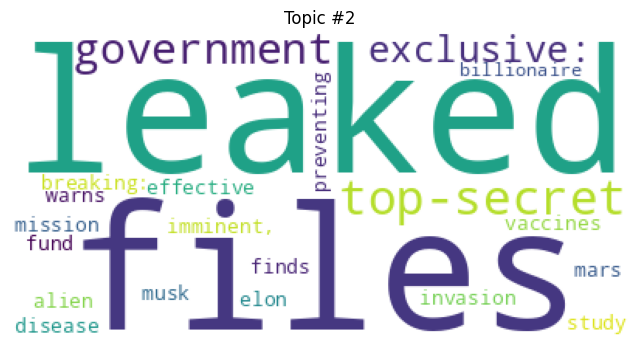

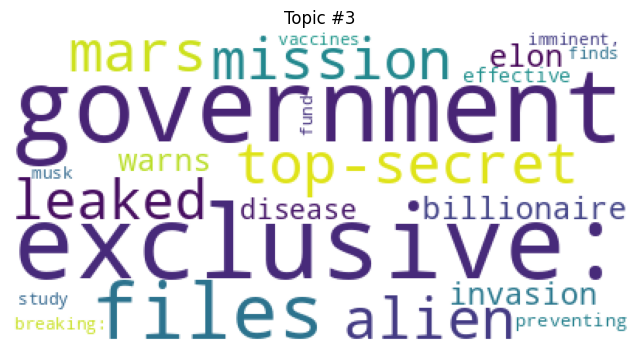

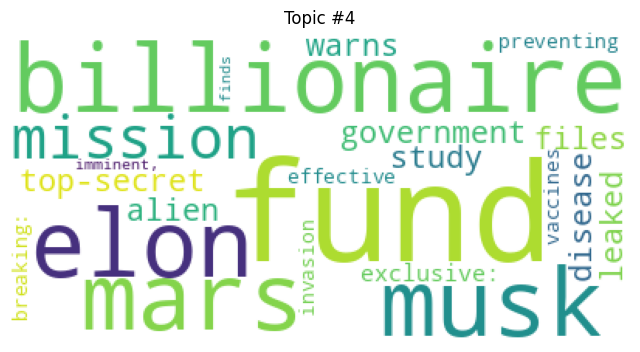

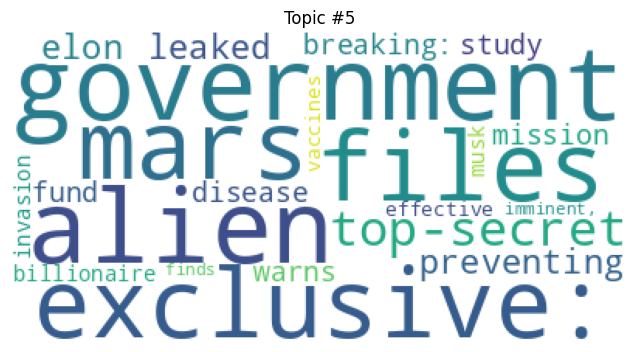

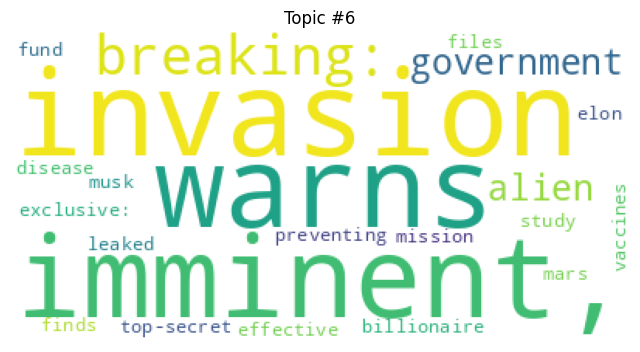

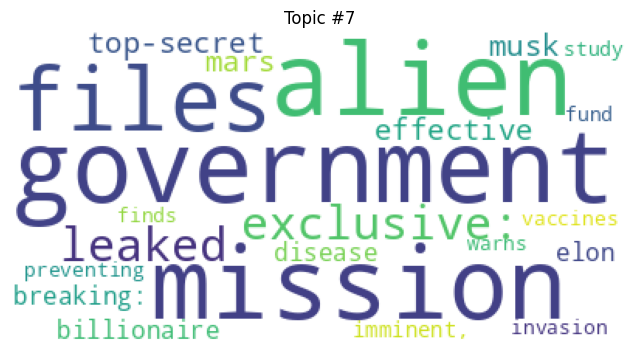

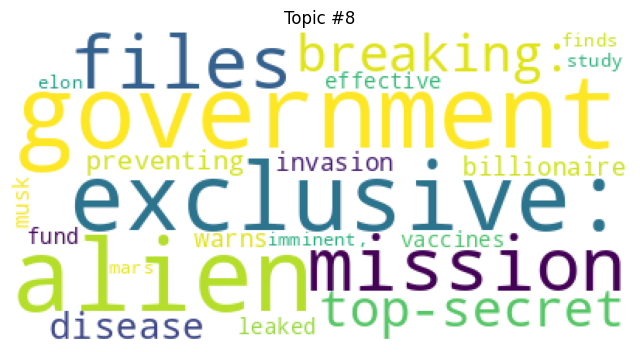

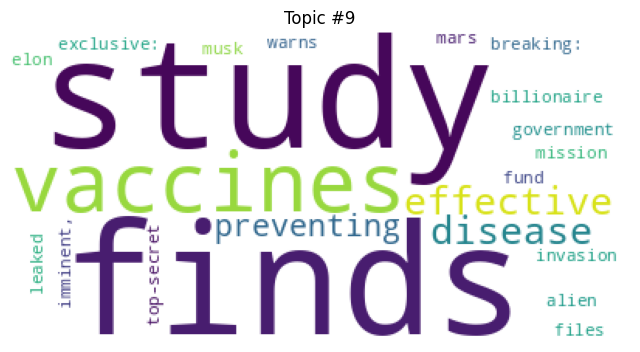

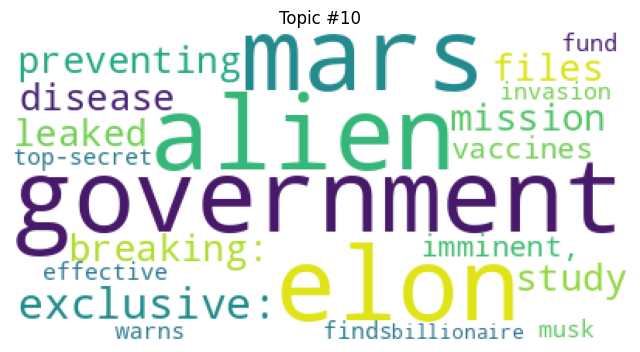

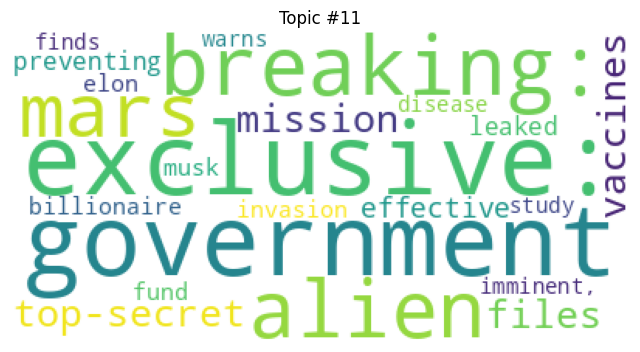

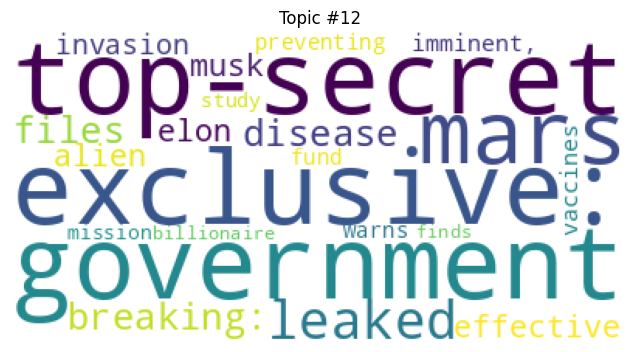

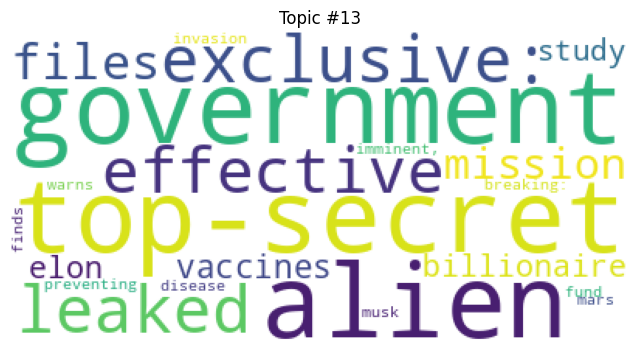

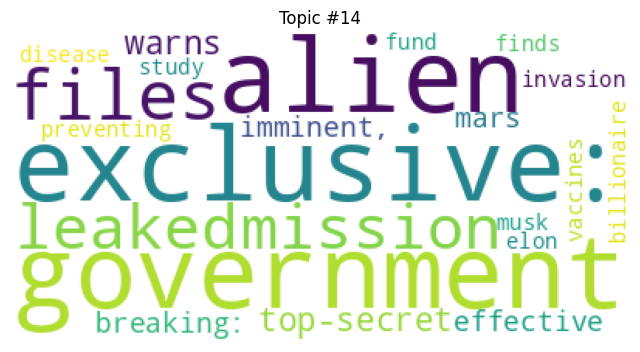

In [27]:
# Visualization 1: Word Clouds for Topics
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create word clouds for each topic
def plot_word_clouds(lda_model, num_topics):
    for i in range(num_topics):
        plt.figure(figsize=(8, 6))
        plt.imshow(WordCloud(background_color="white").fit_words(dict(lda_model.show_topic(i, 30))))
        plt.axis("off")
        plt.title("Topic #" + str(i+1))
        plt.show()

# Generate word clouds for topics
plot_word_clouds(final_lda_model, best_k)



In [ ]:
#Above word cloud shows the words which dominate each topic in bigger size compare to the one which are less significant

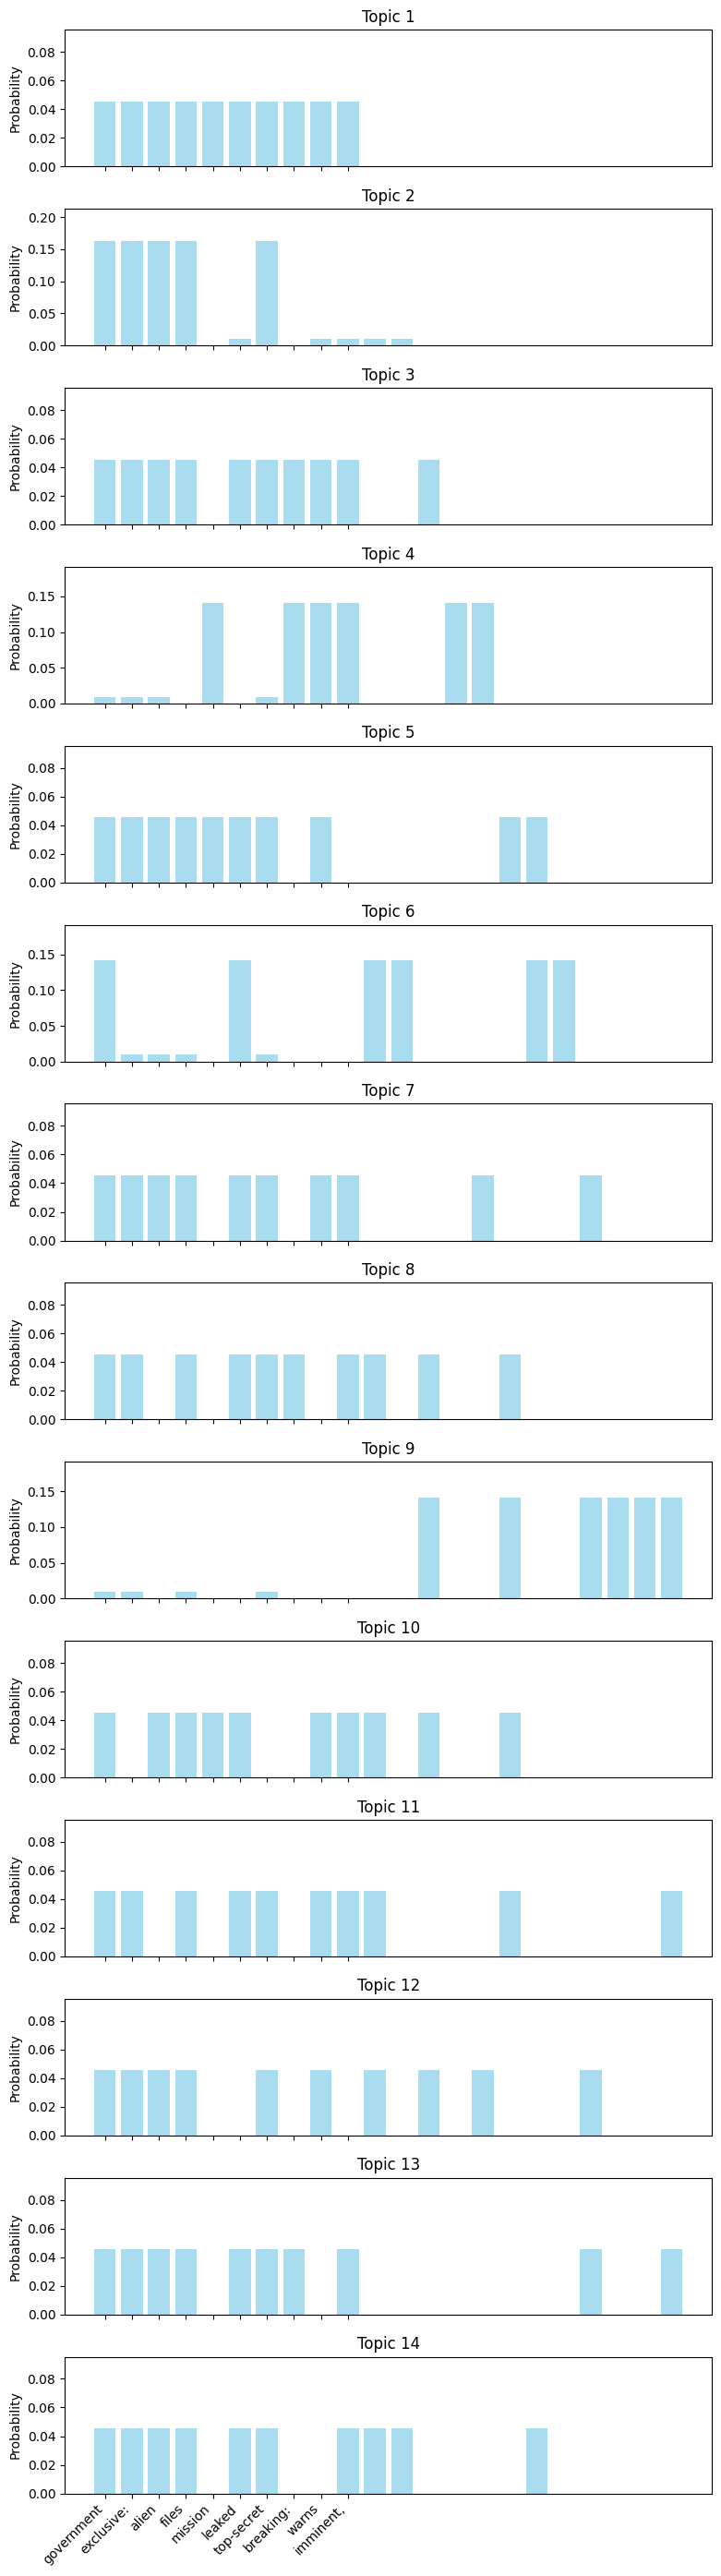

In [28]:

import numpy as np

# Function to plot topic-term distribution
def plot_topic_term_distribution(lda_model, num_words=10):
    num_topics = lda_model.num_topics
    fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(8, 2*num_topics), sharex=True)
    axes = axes.flatten()
    for topic, ax in enumerate(axes):
        topic_terms = lda_model.show_topic(topic, topn=num_words)
        x = [term[0] for term in topic_terms]
        y = [term[1] for term in topic_terms]
        ax.bar(x, y, color='skyblue', alpha=0.7)
        ax.set_title('Topic ' + str(topic+1))
        ax.set_ylabel('Probability')
        ax.set_xticks(np.arange(len(x)))
        ax.set_xticklabels(x, rotation=45, ha='right')
        ax.set_ylim(0, max(y) + 0.05)
    plt.tight_layout()
    plt.show()

# Plot topic-term distribution
plot_topic_term_distribution(final_lda_model)

In [ ]:
#The above bar plot shows the topic term distribution (i.e.) probability of each term in a topic

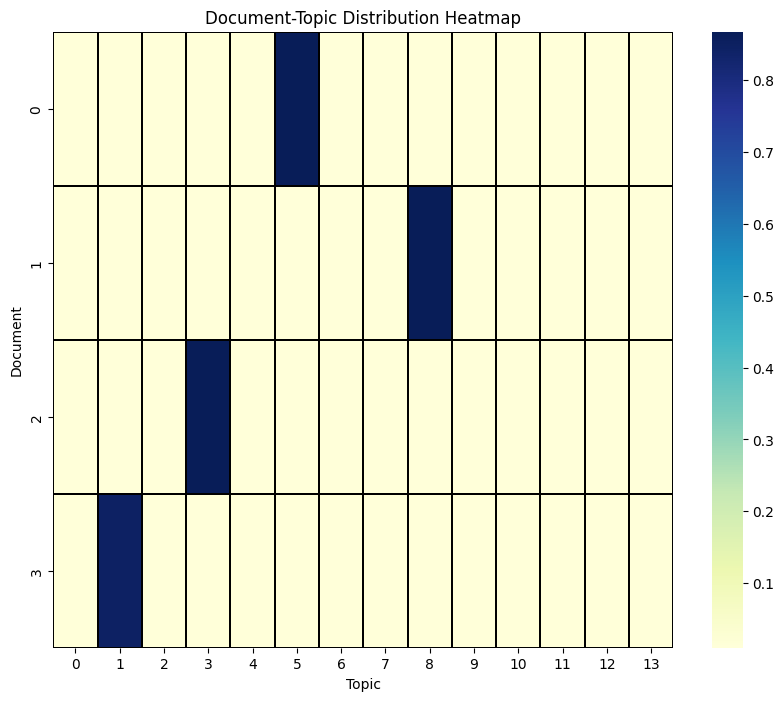

In [29]:
import seaborn as sns
import numpy as np

# Function to create document-topic heatmap
def plot_document_topic_heatmap(lda_model, corpus):
    # Get document-topic probabilities
    document_topic_probs = np.zeros((len(corpus), lda_model.num_topics))
    for i, doc in enumerate(corpus):
        topic_probs = lda_model.get_document_topics(doc)
        for topic, prob in topic_probs:
            document_topic_probs[i, topic] = prob

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(document_topic_probs, cmap="YlGnBu", linewidths=0.1, linecolor='black')
    plt.title('Document-Topic Distribution Heatmap')
    plt.xlabel('Topic')
    plt.ylabel('Document')
    plt.show()

# Plot document-topic heatmap
plot_document_topic_heatmap(final_lda_model, corpus)


In [ ]:
#The above heatmap shows the relation between the document and the topics (i.e.) Document 3 is more related to Topic1,
#Docuemnt 2 is more realted to Topic 3.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [30]:
# Write your code here
'''
Topic Modelling can be evaluated by the concept of Topic Coherence.There are many techniques that are used to obtain topic models.They are:
 Latent Semantic Analysis(LSA) and Latent Dirichlet Allocation (LDA), lda2vec and  BERTopic .
LDA:
The two main inputs to the LDA topic model are the dictionary and the corpus. Gensim creates a unique id for each word in the document.In addition to the corpus and dictionary, we need to provide the number of topics as well.
We can use LDA visualization tool pyLDAvis, by trying a few numbers of topics and comparing the results.Topic coherence is one of the main techniques used to estimate the number of topics.
We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics.
The  plot of coherence value and number of topics shows that coherence score decreases with the number of topics.Optimum topics score is observed at 10 and coherence score 0.44.

LSA:
LSA is typically used as a dimension reduction or noise reducing technique.
The best way to determine k (number of topics) in topic modeling, is by using Topic coherence measure which is a realistic measure for identifying the number of topics.The high value of topic coherence score model will be considered as a good topic model.
For the Plot i.e.,number of topics using LSA algorithm with topic at 2 with coherence score 0.44

So from the analysis, Both LDA and LSA gave same coherence score. So, we can decide which one is best for now. Further data cleansing and
preprocessing can give better results and model with high coherence shall be considered as the best

'''


'\nTopic Modelling can be evaluated by the concept of Topic Coherence.There are many techniques that are used to obtain topic models.They are: \n Latent Semantic Analysis(LSA) and Latent Dirichlet Allocation (LDA), lda2vec and  BERTopic .\nLDA:\nThe two main inputs to the LDA topic model are the dictionary and the corpus. Gensim creates a unique id for each word in the document.In addition to the corpus and dictionary, we need to provide the number of topics as well.\nWe can use LDA visualization tool pyLDAvis, by trying a few numbers of topics and comparing the results.Topic coherence is one of the main techniques used to estimate the number of topics.\nWe need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics.\nThe  plot of coherence value and number of topics shows that coherence sc

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [31]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
It was a great learning experience. This assignment provides a complete hands on experience to building topic modelling models like
LDA, LSA and Bertopic. I understood the underlying working priniciples of these algorithms through this assignment. I even learnt to
optimise the results using coherence as a metric.

The challenges with this assignment is the versions of the models (i.e.) for Q3, the algorithm has been updated and it gives error.
Also other metrics were to be used to access Bertopic instead of Coherence Score Since the coding part is failing even after several
hours of debudding the error. Also I found very few resources only which provides details of how to work with Coherence score with
Bertopic Algortihm


'''

'\nIt was a great learning experience. This assignment provides a complete hands on experience to building topic modelling models like\nLDA, LSA and Bertopic. I understood the underlying working priniciples of these algorithms through this assignment. I even learnt to \noptimise the results using coherence as a metric.\n\nThe challenges with this assignment is the versions of the models (i.e.) for Q3, the algorithm has been updated and it gives error.\nAlso other metrics were to be used to access Bertopic instead of Coherence Score Since the coding part is failing even after several \nhours of debudding the error. Also I found very few resources only which provides details of how to work with Coherence score with \nBertopic Algortihm\n\n\n'